In [36]:
import pandas as pd
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [37]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
train_df = pd.read_csv("/content/twitter_training.csv",header=None)
val_df=pd.read_csv("/content/twitter_validation.csv",header=None)

In [39]:
train_df.columns = ['id','label','entity','text']
val_df.columns = ['id','label','entity','text']

In [40]:
def clean_text(text):
  text = str(text).lower()
  text = text.translate(str.maketrans('', '', string.punctuation))
  stop_words = set(stopwords.words('english'))
  return ' '.join([word for word in text.split() if word not in stop_words ])

In [41]:
train_df['cleaned_text'] = train_df['text'].apply(clean_text)
val_df['cleaned_text'] = val_df['text'].apply(clean_text)

In [42]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['cleaned_text'])
y_train = train_df['label']

X_val = vectorizer.transform(val_df['cleaned_text'])
y_val = val_df['label']


In [43]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [44]:
y_pred = model.predict(X_val)
print("\nClassification Report on Validation Set:\n")
print(classification_report(y_val, y_pred))


Classification Report on Validation Set:

                                   precision    recall  f1-score   support

                           Amazon       0.97      1.00      0.99        34
                      ApexLegends       0.91      0.81      0.85        36
                   AssassinsCreed       0.94      0.88      0.91        33
                      Battlefield       1.00      0.92      0.96        26
                      Borderlands       1.00      0.97      0.98        33
                            CS-GO       0.91      0.94      0.92        32
                       CallOfDuty       0.94      0.94      0.94        31
        CallOfDutyBlackopsColdWar       0.65      0.89      0.75        27
                    Cyberpunk2077       0.92      0.77      0.84        30
                            Dota2       0.86      0.89      0.87        27
                             FIFA       1.00      0.95      0.97        38
                         Facebook       1.00      0.91  

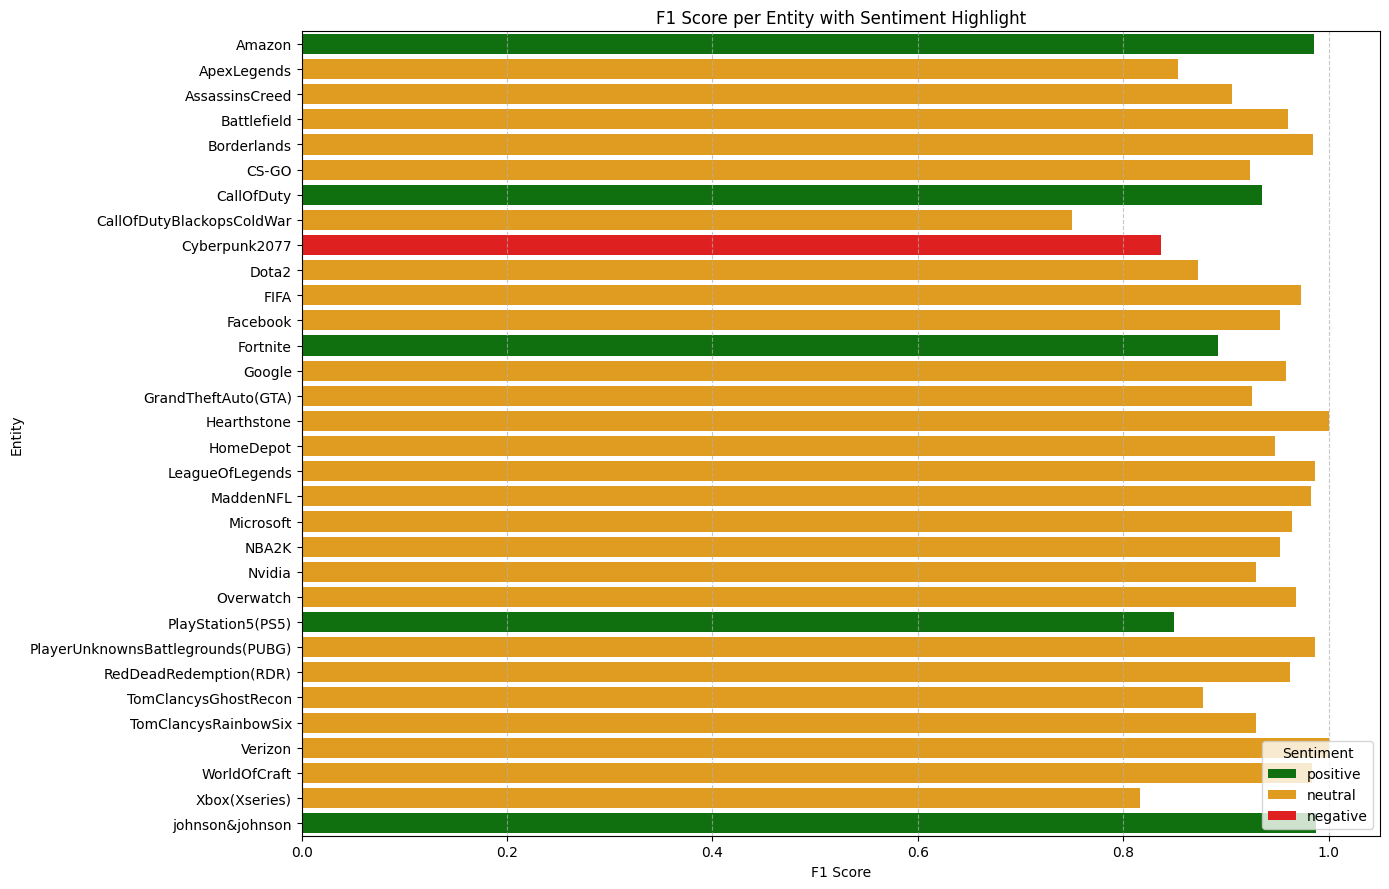

In [45]:

report = classification_report(y_val, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()

df_entities = df.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')
entity_sentiment = {
    "Amazon": "positive",
    "ApexLegends": "neutral",
    "Cyberpunk2077": "negative",
    "Facebook": "neutral",
    "Fortnite": "positive",
    "PlayStation5(PS5)": "positive",
    "Xbox(Xseries)": "neutral",
    "johnson&johnson": "positive",
    "CallOfDuty": "positive",
}
df_entities['sentiment'] = df_entities.index.map(entity_sentiment).fillna('neutral')
palette = {'positive': 'green', 'negative': 'red', 'neutral': 'orange'}

plt.figure(figsize=(14, 9))
sns.barplot(
    y=df_entities.index,
    x='f1-score',
    data=df_entities,
    hue='sentiment',
    dodge=False,
    palette=palette
)
plt.title("F1 Score per Entity with Sentiment Highlight")
plt.xlabel("F1 Score")
plt.ylabel("Entity")
plt.xlim(0, 1.05)
plt.legend(title="Sentiment", loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
